#**4. TRAINING MODEL**

# Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DA/data_files/shopee_final.csv')
df.head()

,processed_comment,class
0,đen cao_su hàng được đóng_gói chắc_chắn đưa th...,pos
1,đặt hôm_qua nay hàng đồng_hồ siêu đẹp chất_lượ...,pos
2,đen đúng nhựa độ chống nước độ bền máy_móc cùn...,pos
3,yes nhựa đen đồng_hồ đẹo đúng như mô_tả giao h...,pos
4,đen trắng đồng_hồ đẹp đóng_gói đẹp shop tặng k...,pos


In [ ]:
df['class'] = df['class'].apply(lambda x: 0 if x == 'neg' else 1 )
df.head()

,processed_comment,class
0,đen cao_su hàng được đóng_gói chắc_chắn đưa th...,1
1,đặt hôm_qua nay hàng đồng_hồ siêu đẹp chất_lượ...,1
2,đen đúng nhựa độ chống nước độ bền máy_móc cùn...,1
3,yes nhựa đen đồng_hồ đẹo đúng như mô_tả giao h...,1
4,đen trắng đồng_hồ đẹp đóng_gói đẹp shop tặng k...,1


In [ ]:
df.shape

(294831, 2)

In [ ]:
df['class'].value_counts()

,count
class,
1,272209
0,22622


#Train test split
Ta thấy rằng giữa hai nhóm positive và negative có chênh lệnh lớn, nên tập train data của ta sẽ bằng:

min(size(positive)) * 0.8, size(negative) * 0.2

In [ ]:
half_min_size = min(df['class'].value_counts())
half_min_size

22622

In [ ]:
from sklearn.utils import shuffle
import random
df_pos = df[df['class'] == 1]
df_neg = df[df['class'] == 0]

# Trộn dữ liệu của tập positive
df_pos = shuffle(df_pos)
df_pos = df_pos.reset_index(drop=True)

In [ ]:
# Lấy index phần dữ liệu của tập Positive bằng với tập Negative
positive_index = random.sample(range(0, df_pos.shape[0]), half_min_size)
positive_index[:10]

[68047, 75978, 54883, 89419, 106871, 87497, 52560, 82941, 41772, 44061]

In [ ]:
df_pos2 = df_pos.iloc[positive_index,:]
df_pos2.head()

,processed_comment,class
68047,áo khá đẹp giống hình nghĩ giá rẻ đ h mang,1
75978,khóc bụi mắt bụi hoà cùng nước_mắt chảy dần xu...,1
54883,ví đẹp giá tạm nhưng giao hàng lâu quá đợi mòn...,1
89419,giao hàng nhanh_chóng đóng_gói sản_phẩm cẩn_th...,1
106871,chưa nhận hàng ưng quần lưng cao mặc lên tôn đ...,1


In [ ]:
# Kết hợp tập positive đã được chia và tập negative lại với nhau
df1 = pd.concat([df_neg, df_pos2], axis=0)
df1 = (shuffle(df1)).reset_index(drop=True)
df1.shape

(45244, 2)

In [ ]:
df1.head()

,processed_comment,class
0,chồng mặc vừa xinh áo vải tốt giá quá ok la nh...,1
1,cao_su cứng khác ảnh nhận hàng quá chán nhìn đ...,0
2,sản_phẩm rất đẹp moi nên mua chúc shop buôn ma...,1
3,shop giao sản_phẩm giao sai sản_phẩm lỗi đầu m...,0
4,giao hàng nhanh_chóng đóng_gói cẩn_thận chắc_c...,0


In [ ]:
# Ghi ra file
df1.to_csv("/content/drive/MyDrive/DA/data_files/train_comments.csv", index=False)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45244 entries, 0 to 45243
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   processed_comment  45244 non-null  object
 1   class              45244 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 707.1+ KB


In [ ]:
# Chia dữ liệu train, test với tỷ lệ 70% cho train và 30% cho test
df1 = pd.read_csv("/content/drive/MyDrive/DA/data_files/train_comments.csv")
X = df1['processed_comment']
y = df1['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(X_train, y_train)

,processed_comment
11677,sách đầy_đủ thông_tin màu dễ nhìn nhỏ gọn dễ d...
6002,kẹp đúng mẫu nhưng lỗi shop một dây kia không ...
5198,màu hơi khác ảnh
35873,đen không biết dép đẹp đi êm lắm
39192,dép chắc đẹp á mua mẹ bán đi mất chưa nhìn thấ...
...,...
11284,sản_phẩm mỏng nhưng sợ giá tiền ok
44732,giống mẫu may chưa như rách
38158,nhựa bạc giả rẻ nhưng ship hơi lâu số khuyên lệch
860,giống hình cao_su đen thấy trơn tác_dụng chống...


,class
11677,1
6002,0
5198,0
35873,1
39192,1
...,...
11284,0
44732,0
38158,1
860,0


# **N-grams & Bag of Words**

In [ ]:
acc_scores = {'BoW': [], 'TF-IDF': [], 'Word2Vec': [], 'Doc2Vec': []}

In [ ]:
vect = CountVectorizer(ngram_range=(1,2),min_df=2)

vect.fit(X_train)
X_train_bow = vect.fit_transform(X_train)
X_test_bow = vect.transform(X_test)

df_bow = pd.DataFrame(data=X_train_bow.toarray(), columns=vect.get_feature_names_out())
df_bow.head()

,ac,acrylic,admin,admin nhiều,again,aha,ai,ai thích,album,am,...,ứn,ứng,ứng lắm,ứng_dụng,ứng_dụng nhưng,ứng_viên,ừa,ừm,ửng,ửng hộ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Models Comparision
models = [KNeighborsClassifier(n_neighbors=3), RandomForestClassifier(), XGBClassifier(), LogisticRegression(), SVC()]
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Time'])

for idx, model in enumerate(models):
    start_time = time.time()
    model.fit(X_train_bow, y_train)
    predictions = model.predict(X_test_bow)
    accuracy = accuracy_score(y_test, predictions)
    acc_scores['BoW'].append(accuracy)
    # cv_results = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')
    train_time = time.time() - start_time
    df_newrow = pd.DataFrame.from_dict({idx: [type(model).__name__, accuracy, train_time]},
                                    orient='index', columns=['Model','Accuracy','Time'])
    results = pd.concat([results, df_newrow])
results = results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
results

,Model,Accuracy,Time
0,LogisticRegression,0.852470,3.227092
1,SVC,0.849928,621.172241
2,RandomForestClassifier,0.836778,197.168264
3,XGBClassifier,0.833131,10.921531
4,KNeighborsClassifier,0.724721,16.365057


# **N-grams & TF-IDF**


In [ ]:
tfidf = TfidfVectorizer(ngram_range=(1,2),min_df=2)

vect = tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

df_tfidf = pd.DataFrame(data=X_train_tfidf.toarray(), columns=tfidf.get_feature_names_out())
df_tfidf.head()

,ac,acrylic,admin,admin nhiều,again,aha,ai,ai thích,album,am,...,ứn,ứng,ứng lắm,ứng_dụng,ứng_dụng nhưng,ứng_viên,ừa,ừm,ửng,ửng hộ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Models Comparision
models = [KNeighborsClassifier(n_neighbors=3), RandomForestClassifier(), XGBClassifier(), LogisticRegression(), SVC()]
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Time'])

for idx, model in enumerate(models):
    start_time = time.time()
    model.fit(X_train_tfidf, y_train)
    train_time = time.time() - start_time
    predictions = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, predictions)
    acc_scores['TF-IDF'].append(accuracy)
    # cv_results = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')
    df_newrow = pd.DataFrame.from_dict({idx: [type(model).__name__, accuracy, train_time]},
                                    orient='index', columns=['Model', 'Accuracy', 'Time'])
    results = pd.concat([results, df_newrow])
results = results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
results

,Model,Accuracy,Time
0,SVC,0.862416,741.901386
1,LogisticRegression,0.857111,2.092323
2,RandomForestClassifier,0.837441,139.746576
3,XGBClassifier,0.834457,40.890645
4,KNeighborsClassifier,0.522710,0.009215


# **Word2Vec**

In [ ]:
import gensim

# Tokenize the comments
tokenized_comments = [comment.split() for comment in X_train]

# Train Word2Vec model
model = gensim.models.Word2Vec(tokenized_comments, vector_size=100, window=5, min_count=1, workers=4)

# Get word embeddings for each comment
def get_comment_embedding(comment, model):
    embeddings = []
    for word in comment.split():
        if word in model.wv:
            embeddings.append(model.wv[word])
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model.vector_size)

X_train_word2vec = [get_comment_embedding(comment, model) for comment in X_train]
X_test_word2vec = [get_comment_embedding(comment, model) for comment in X_test]

# Convert to numpy arrays
X_train_word2vec = np.array(X_train_word2vec)
X_test_word2vec = np.array(X_test_word2vec)

In [ ]:
# Models Comparision
models = [KNeighborsClassifier(n_neighbors=3), RandomForestClassifier(), XGBClassifier(), LogisticRegression(), SVC()]
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Time'])

for idx, model in enumerate(models):
    start_time = time.time()
    model.fit(X_train_word2vec, y_train)
    predictions = model.predict(X_test_word2vec)
    accuracy = accuracy_score(y_test, predictions)
    acc_scores['Word2Vec'].append(accuracy)
    # cv_results = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')
    train_time = time.time() - start_time
    df_newrow = pd.DataFrame.from_dict({idx: [type(model).__name__, accuracy, train_time]},
                                    orient='index', columns=['Model', 'Accuracy', 'Time'])
    results = pd.concat([results, df_newrow])
results = results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
results

,Model,Accuracy,Time
0,SVC,0.842414,119.740919
1,RandomForestClassifier,0.828710,72.555479
2,XGBClassifier,0.822853,5.425877
3,LogisticRegression,0.819649,1.001356
4,KNeighborsClassifier,0.792795,9.216942


# **Doc2Vec**

In [ ]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Prepare data for Doc2Vec
documents = [TaggedDocument(doc.split(), [i]) for i, doc in enumerate(X_train)]

# Train Doc2Vec model
model = Doc2Vec(documents, vector_size=100, window=5, min_count=1, workers=4, epochs=20)

# Infer vectors for train and test data
X_train_doc2vec = [model.infer_vector(doc.split()) for doc in X_train]
X_test_doc2vec = [model.infer_vector(doc.split()) for doc in X_test]

# Convert to numpy arrays
X_train_doc2vec = np.array(X_train_doc2vec)
X_test_doc2vec = np.array(X_test_doc2vec)

In [ ]:
models = [KNeighborsClassifier(n_neighbors=3), RandomForestClassifier(), XGBClassifier(), LogisticRegression(), SVC()]
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Time'])

for idx, model in enumerate(models):
    start_time = time.time()
    model.fit(X_train_doc2vec, y_train)
    predictions = model.predict(X_test_doc2vec)
    accuracy = accuracy_score(y_test, predictions)
    acc_scores['Doc2Vec'].append(accuracy)
    train_time = time.time() - start_time
    df_newrow = pd.DataFrame.from_dict({idx: [type(model).__name__, accuracy, train_time]},
                                    orient='index', columns=['Model', 'Accuracy', 'Time'])
    results = pd.concat([results, df_newrow])
results = results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
results

,Model,Accuracy,Time
0,SVC,0.777434,267.676599
1,LogisticRegression,0.760194,0.277156
2,XGBClassifier,0.757984,8.731899
3,RandomForestClassifier,0.737761,62.016660
4,KNeighborsClassifier,0.675213,4.502849


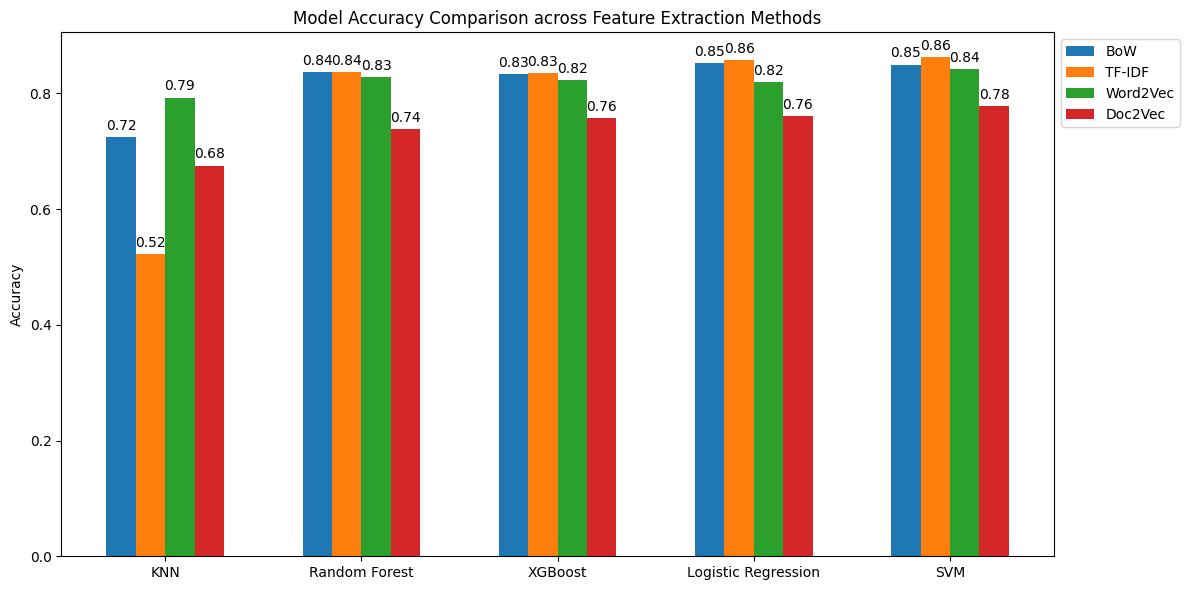

In [ ]:
methods = ['BoW','TF-IDF', 'Word2Vec', 'Doc2Vec']
models = ['KNN', 'Random Forest', 'XGBoost', 'Logistic Regression', 'SVM']
x = np.arange(len(models))
width = 0.15

fig, ax = plt.subplots(figsize=(12, 6))
rects = []

for i, method in enumerate(methods):
    offset = i * width
    rects.append(ax.bar(x + offset, acc_scores[method], width, label=method))

ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison across Feature Extraction Methods')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(models)
ax.legend()

for rect_group in rects:
    for rect in rect_group:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
fig.tight_layout()
plt.show()

# **Build Model**

In [ ]:
def trainTunningModel(lst_models, X_train_vectorizer):
    models_final = []
    for model_name, model, params in lst_models:
        tic = time.time()
        search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy',error_score=0)
        search.fit(X_train_vectorizer, y_train)
        model_tunned = model.set_params(**search.best_params_)
        models_final.append((model_name, model_tunned))
        toc = time.time()
        print('Model {} has been tunned in {:,.2f} seconds'.format(model_name, (toc - tic)))
    return models_final

def trainModel(lst_models, X_train_vectorizer, X_test_vectorizer):
    results = pd.DataFrame(columns=['Model', 'Accuracy', 'Train Time', 'Test Time'])
    for idx, (model_name, model) in enumerate(lst_models):
      start_train = time.time()
      model.fit(X_train_vectorizer, y_train)
      end_train = time.time()
      start__test = time.time()
      predictions = model.predict(X_test_vectorizer)
      end_test = time.time()
      accuracy = accuracy_score(y_test, predictions)
      train_time = end_train - start_train
      test_time = end_test - start__test
      df_newrow = pd.DataFrame.from_dict({idx: [model_name, accuracy, train_time, test_time]},
                                      orient='index', columns=['Model', 'Accuracy','Train Time', 'Test Time'])
      results = pd.concat([results, df_newrow])
    results = results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
    return results

In [ ]:
lst_models = [
    ('Logistic Regression - [solver: lbfgs]', LogisticRegression(solver='lbfgs')),
    ('Logistic Regression - [solver: liblinear]', LogisticRegression(solver='liblinear')),
    ('Logistic Regression - [solver: newton-cg]', LogisticRegression(solver='newton-cg')),
    ('SVC - [kernel: linear]', SVC(kernel='linear', random_state=42)),
    ('SVC - [kernel: poly]', SVC(kernel='poly', random_state=42)),
    ('SVC - [kernel: rbf]', SVC(kernel='rbf', random_state=42)),
    ('SVC - [kernel: sigmoid]', SVC(kernel='sigmoid', random_state=42))
]
original_models = trainModel(lst_models, X_train_tfidf, X_test_tfidf)
original_models

,Model,Accuracy,Train Time,Test Time
0,SVC - [kernel: rbf],0.862416,702.737943,46.067745
1,SVC - [kernel: linear],0.857332,395.543211,33.513179
2,Logistic Regression - [solver: lbfgs],0.857111,0.941599,0.001352
3,SVC - [kernel: sigmoid],0.857111,445.949295,31.700361
4,Logistic Regression - [solver: liblinear],0.856669,0.526167,0.001375
5,Logistic Regression - [solver: newton-cg],0.856559,0.287435,0.001337
6,SVC - [kernel: poly],0.832578,1016.170325,69.971485


In [ ]:
lst_tunning_models = [
    ('Logistic Regression - [solver: lbfgs]', LogisticRegression(solver='lbfgs'), {
        'multi_class': ['ovr', 'multinomial'],
        'C': [0.001, 0.01, 0.1, 1.0, 10, 100],
        'penalty': ['none', 'l1', 'l2', 'elasticnet']
        })
]
lst_tunning_models = trainTunningModel(lst_tunning_models, X_train_tfidf)
lst_tunning_models

Model Logistic Regression - [solver: lbfgs] has been tunned in 117.16 seconds


[('Logistic Regression - [solver: lbfgs]',
  LogisticRegression(multi_class='multinomial'))]

In [ ]:
lst_models = [('Logistic Regression',LogisticRegression(solver='lbfgs', multi_class='multinomial')),
              ('SVC', SVC(kernel='rbf', random_state=42))]
trained_models = trainModel(lst_models, X_train_tfidf, X_test_tfidf)
trained_models

,Model,Accuracy,Train Time,Test Time
0,SVC,0.862416,718.340446,47.115203
1,Logistic Regression,0.860206,1.938222,0.001422


Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4480
           1       0.86      0.86      0.86      4569

    accuracy                           0.86      9049
   macro avg       0.86      0.86      0.86      9049
weighted avg       0.86      0.86      0.86      9049

SVC
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4480
           1       0.87      0.86      0.86      4569

    accuracy                           0.86      9049
   macro avg       0.86      0.86      0.86      9049
weighted avg       0.86      0.86      0.86      9049



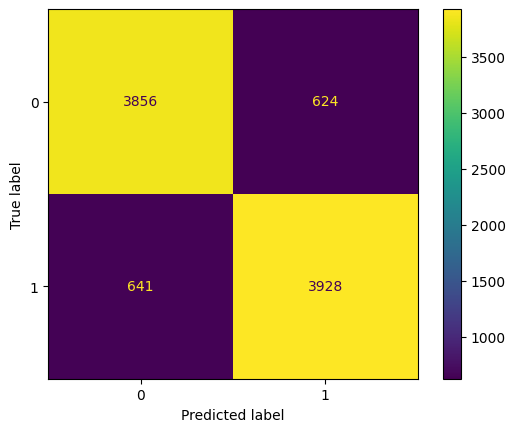

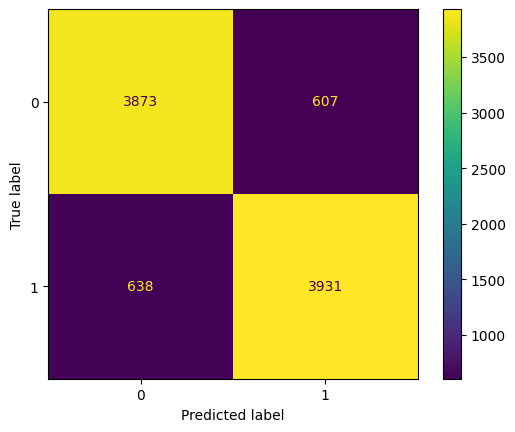

In [ ]:
for model_name, model, *rest in lst_models:
  y_pred = model.predict(X_test_tfidf)
  acc = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')
  print(model_name)
  print(classification_report(y_test,y_pred))
  ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

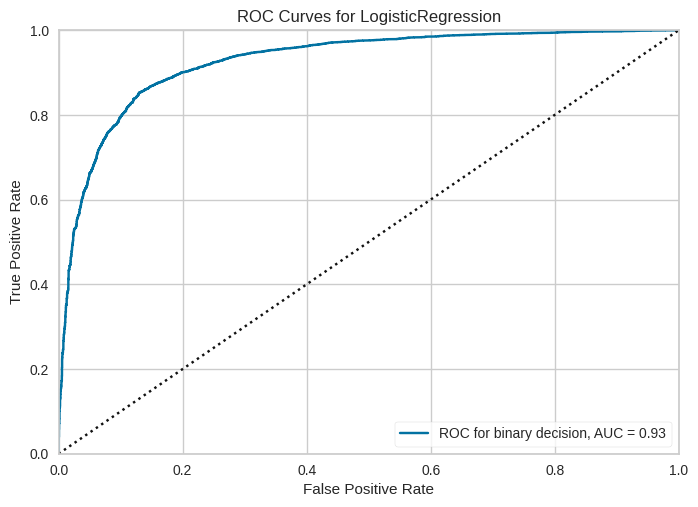

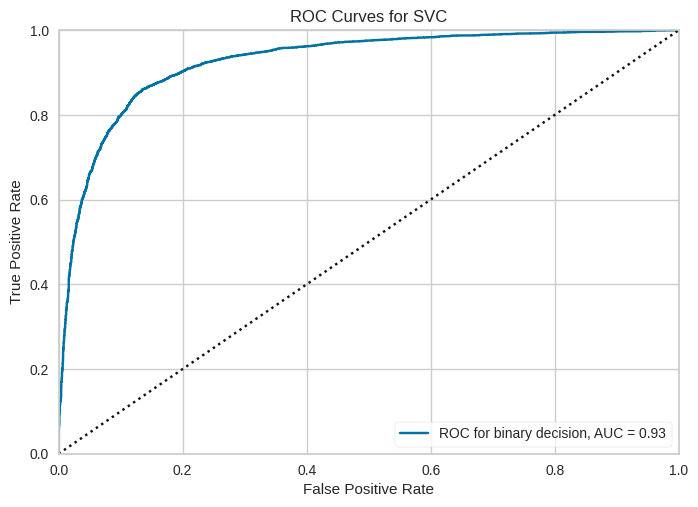

In [ ]:
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, roc_auc
for model_name, model, *rest in lst_models:
  visualizer = ROCAUC(model, classes=y.unique(), binary=True)
  visualizer.fit(X_train_tfidf, y_train)
  visualizer.score(X_test_tfidf, y_test)
  visualizer.show()

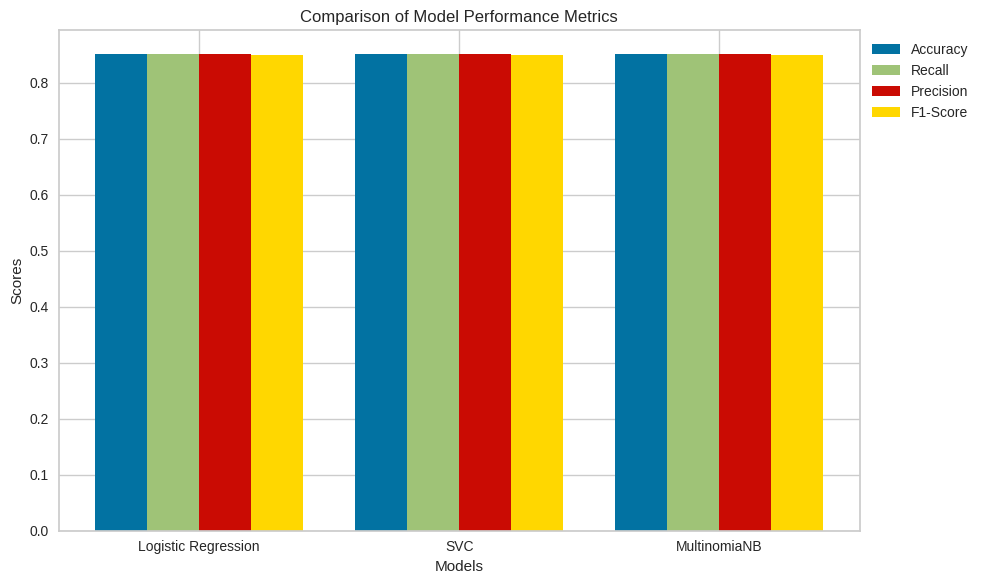

In [ ]:
import matplotlib.pyplot as plt

bar_width = 0.2
index = range(len(lst_models))

plt.figure(figsize=(10, 6))

plt.bar(index, acc, bar_width, label='Accuracy', color='b')
plt.bar([i + bar_width for i in index], recall, bar_width, label='Recall', color='g')
plt.bar([i + 2 * bar_width for i in index], precision, bar_width, label='Precision', color='r')
plt.bar([i + 3 * bar_width for i in index], f1, bar_width, label='F1-Score', color='gold')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Model Performance Metrics')

model_names = [model_name for model_name, model in lst_models]
plt.xticks([i + 1.5 * bar_width for i in index], model_names)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [ ]:
import pickle
with open('/content/drive/MyDrive/DA/files_pickle/logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(LogisticRegression(solver='lbfgs'), f)

with open('/content/drive/MyDrive/DA/files_pickle/svc_model.pkl', 'wb') as f:
    pickle.dump(SVC(kernel='rbf', probability=True, random_state=42), f)